In [44]:
import numpy as np
import numpy.random as r
import matplotlib.pyplot as plt

Сгенерируем данные как $y = 3X^2 + 2X + 5 + $белый шум

In [45]:
X = 3 * r.rand(300,1) - 1

In [46]:
y = 3*X*X + 2*X + 5 + r.randn(300,1)

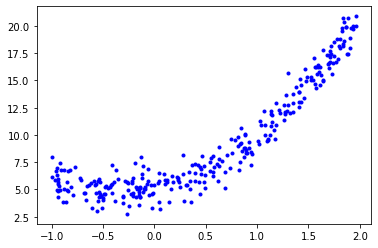

In [47]:
plt.plot(X, y, "b.")

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=1)

In [51]:
#X_train.shape
#y_train[:,0].shape
X_train[:4]

array([[ 1.62431883],
       [-0.1527359 ],
       [ 1.88340936],
       [ 0.62126185]])

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [182]:
model = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
X_test2 = np.arange(-1.0, 2.0, 0.01)[:, np.newaxis]
y_pred = model.predict(X_test2)

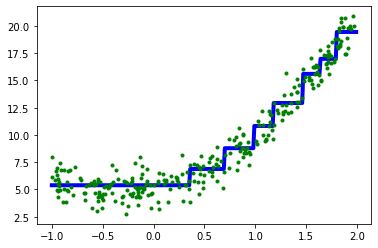

In [183]:
plt.plot(X_test2, y_pred, "b", linewidth=4)
plt.plot(X, y, "g.")
plt.show()

In [179]:
import sklearn.metrics as metr
mse = metr.mean_squared_error(y_test, model.predict(X_test))
r2 = metr.r2_score(y_test, model.predict(X_test))
print (f'MSE={mse} R2={r2}')

MSE=1.2775257293530495 R2=0.9534419007076079


In [184]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

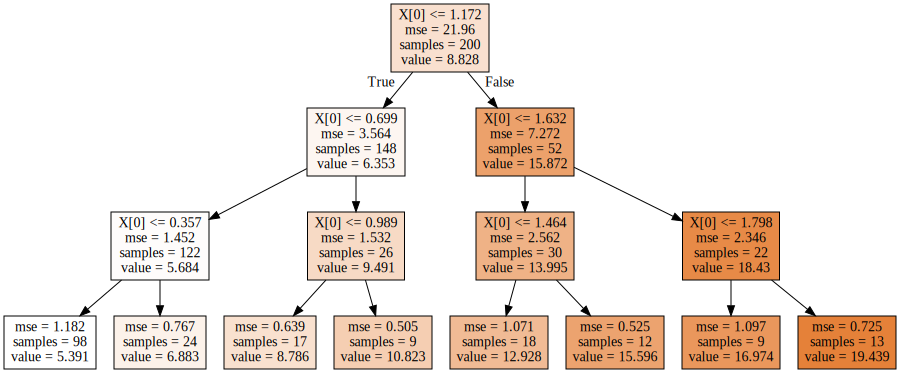

In [186]:
graph = Source(export_graphviz(model, out_file=None
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [97]:
residuals = y_test - model.predict(X_test)

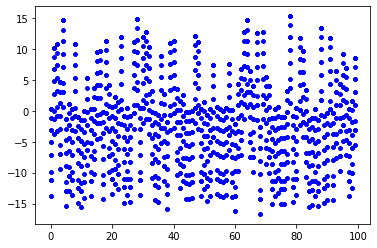

In [100]:
rp = plt.plot(residuals, "b.")

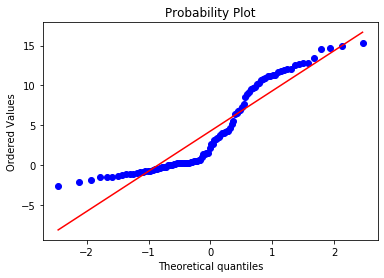

In [101]:
import scipy
residulas1dim = residuals[:,0]
qq = scipy.stats.probplot(residulas1dim, dist="norm", plot=plt)

In [109]:
from pandas import DataFrame
df = DataFrame(residuals[:,0])

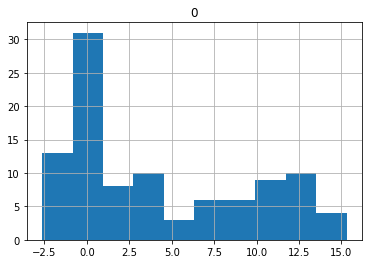

In [110]:
fff = df.hist(bins=10)

In [187]:
from sklearn.neighbors import KNeighborsRegressor

In [193]:
model2 = KNeighborsRegressor()
model2.fit(X_train, y_train)
y_predKnn = model2.predict(X_test2)

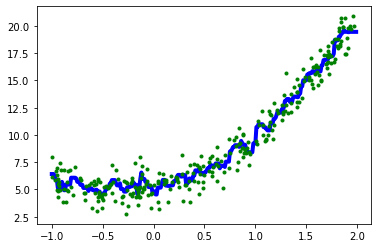

In [194]:
plt.plot(X_test2, y_predKnn, "b", linewidth=4)
plt.plot(X, y, "g.")
plt.show()

In [195]:
mse2 = metr.mean_squared_error(y_test, model2.predict(X_test))
r22 = metr.r2_score(y_test, model2.predict(X_test))
print (f'MSE={mse2} R2={r22}')

MSE=1.039349171726666 R2=0.9621219981524594
